# **注意！**
本動画では，以下の知識を前提としています。<br>
・Pythonの基本的な使い方<br>
・Numpyの　　　〃<br>
・行列の演算

# 遺伝的アルゴリズムとブルートフォースサーチ
### 目標：0-1ナップザック問題（解が0と1の配列であらわされるナップザック問題）を上記の2つの方法で解き，両者の長所と短所を理解する。また，遺伝的アルゴリズムのハイパーパラメータの役割を理解する。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # importすると進捗状況が表示される
import random, itertools

# 0-1 ナップザック問題
下記の仮定の下で，ナップザックに詰め込まれた物品の価値の合計をできるだけ大きくするには，どのような組み合わせが最適か。

仮定1：すべての物品は重さと価値を持つ。<br>
仮定2：すべての物品は1つしかない。<br>
仮定3：ナップザックに入れられる物品の総重量には制限がある。<br>



# 具体例を考える
ナップザックの容量：4kg<br>
・お米：3kg，1500円<br>
・スイカ：1kg，1000円<br>
・野菜ジュースセット：4kg，2000円<br>
<br>
1. 全部詰め込むことはできない。（∵総重量：3+1+4=8kg > 4kg：ナップザックの容量）

2. お米とスイカで4kg，2500円なので，野菜ジュースセットよりも価値が高い。<br>
⇒この場合は，お米とスイカの組み合わせが最適になる。

※以下，物品の総重量をナップザックの容量以下に抑えつつ，合計価値が最も高くなるように物品を詰め込んだときの合計価値・合計重量・物品の組み合わせをそれぞれ「最適価値（又は最適スコア）・最適重量・最適解」と定義する。

# 実際にナップザック問題を定義してみる。


In [ ]:
weight = [750,700,900,600,1200,1250,
          1850,2050,1750,2700,3150]

value = [7,6,10,10,22,17,23,27,20,33,36]

https://blog.brainpad.co.jp/entry/2020/10/09/000002 を参考にした。最適価値は「72」らしい。 

# 最適解を総当たり（ブルートフォース）で求めてみる
ポイント：itertoolsで，[0, 1] の直積を計算する。以下の例を参照。

```
>>>print(list(itertools.product([0,1], repeat=3)))
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
```

itertoolsについて：https://qiita.com/anmint/items/37ca0ded5e1d360b51f3<br>
直積の数学的定義について：https://mathwords.net/tyokusekisyugou

In [ ]:
print(list(itertools.product([0,1], repeat=11)))

[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1), (0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0), (0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1), (0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0), (0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1), (0, 0, 0, 0, 0, 0, 

In [ ]:
def BruteFroce(w_func, v_func, s_func, length):
    candidates = np.array(list(itertools.product([0,1], repeat=length)))

    # スコアを算出
    w_sum = w_func(candidates)
    v_sum = v_func(candidates)
    score = s_func(w_sum, v_sum)

    # 最良解を取得
    solution_index = np.argmax(score)
    best_solution = candidates[solution_index, ]

    # 結果を出力
    print(f"最適重量：{w_func(best_solution)}")
    print(f"最適スコア：{v_func(best_solution)}")
    print(f"最適解：{best_solution}")


# グローバル変数（遺伝子長・突然変異率・評価関数・制約条件）を定義
GENE_LENGTH = len(weight)
ZERO_TO_ONE = 5000 / np.mean(weight) / len(weight)

w_func = lambda g: np.dot(g,weight)
v_func = lambda g: np.dot(g,value)
s_func = lambda w,v: v * (w < 5000)

BruteFroce(w_func, v_func, s_func, len(weight))

最適重量：4900
最適スコア：72
最適解：[0 0 0 1 1 1 1 0 0 0 0]


# もっと物品の数が多い場合で試してみる
http://ipr20.cs.ehime-u.ac.jp/column/ga/chapter4.html を参考にした。最適価値は不明。


In [ ]:
weight = [2,10,7,2,4,9,10,7,8,5,
          3,10,9,8,8,5,7,3,9,7,
          2,10,7,9,7,2,10,4,9,10,
          4,7,8,5,2,3,10,9,7,8,
          8,5,7,5,7,3,9,7,7,9]

value = [21,22,28,21,12,24,15,2,25,28,
         4,22,36,2,7,40,14,40,33,21,
         28,22,14,36,28,21,18,12,24,15,
         21,2,25,28,28,4,22,36,31,2,
         7,40,14,4,28,40,33,35,21,20]

# グローバル変数（遺伝子長・突然変異率・評価関数・制約条件）を定義
GENE_LENGTH = len(weight)
ZERO_TO_ONE = 40 / np.mean(weight) / len(weight)

w_func = lambda g: np.dot(g,weight)
v_func = lambda g: np.dot(g,value)
s_func = lambda w,v: v * (w < 40)

また総当たりでやってみる

In [ ]:
BruteFroce(w_func, v_func, s_func, len(weight))

Google Colaoratoryだと，メモリの容量が足りずクラッシュした。

なぜなのか。また，どうすればよいのか。



# ブルートフォースがうまくいかない理由
組み合わせ爆発が起こって，計算時間が膨大になるから。

1つ目のナップザック問題の物品数：11個　⇒　組み合わせ数：2<sup>11</sup> ＝ 2048

2つ目のナップザック問題の物品数：50個　⇒　組み合わせ数：2<sup>50</sup> ＝ 2<sup>10×5</sup> ＝ 1024<sup>5</sup> ＜ 10<sup>3×</sup><sup>5</sup> ＝ 10<sup>15</sup>


# 解決策
解を網羅的に探索するのではなく，部分的かつ効率的に探索すればよい。

⇒遺伝的アルゴリズムの得意分野

# 遺伝的アルゴリズムとは

アルゴリズム(計算手法)の一種<br>
・評価関数の全順序性と、探索空間が位相（トポロジー）を持っているという2条件を満たしていれば，どんな問題でも適用可能。<br>
・特に，評価関数が微分不可能な場合，局所最適解が多数ある場合に有効（なはず）。

# アルゴリズムの概要

準備<br>
・問題の解を0と1の配列で表す。<br>
・同時に探す解の個数：N，解を探索する期間：Gを決める。<br>

メイン
1. 解候補（個体）をランダムにN個生成する。
2. 評価関数を用いて，各個体の適応度を計算する。
3. 適応度に応じて，次世代へ継承する個体（エリート）を決定する。
4. 2つのエリートをランダムに選び，それらを掛け合わせる。<br>
5. 4で得られた個体に一定の確率で突然変異を生じさせながら，次の世代を生成する。
6. 2~6を繰り返す。

# 遺伝的アルゴリズムを実装してみる
後ほど，異なるハイパーパラメータをもつ遺伝的アルゴリズム同士を比較したいため，量産が容易なようにクラスで書く。

In [ ]:
# 遺伝的アルゴリズムをクラスで定義
# GENE_LENGTH(遺伝子長)はグローバル変数

class GeneticAlgorithm():
    # 二進数から十進法に変換するメソッド
    # @staticmethod
    # def decode(matrix):
    #     try:
    #         d = [2**i for i in range(matrix.shape[1])]
    #     except:
    #         d = [2**i for i in range(len(matrix))]
    #     return np.dot(matrix, d)

    # 十進数から二進法に変換するメソッド
    # べき乗判定の方法は次を参照 https://kenyu-life.com/2019/01/15/n_ampersamd_n-1equal0/
    # @classmethod
    # def encode(cls, n, temp=[], dev=128):
    #     if (n == 0):
    #         return temp
    #     elif n >= 2*dev:
    #         raise Exception(f"input bigger than dev:{dev} error")
    #     elif (dev & (dev-1)):
    #         raise Exception("devision value error")
    #     elif (dev <= n < 2*dev):
    #         temp.insert(0,1)
    #         return cls.encode(n-dev, temp, dev//2)
    #     else:
    #         temp.insert(0,0)
    #         return cls.encode(n, temp, dev//2)

    @staticmethod
    def crossover(gene1, gene2):
        crossover_point = np.random.randint(0,len(gene1))
        temp = gene1[:crossover_point].copy()  # Numpyで書いているので，"copy()" がないと参照が返される
        gene1[:crossover_point] = gene2[:crossover_point]
        gene2[:crossover_point] = temp
        return gene1, gene2

    @staticmethod
    def mutate(array ,prob_zero_to_one):
        temp = np.zeros_like(array)
        for i, element in enumerate(array):
            if (element == 0 and np.random.rand() < prob_zero_to_one):
                temp[i] = 1
            elif (element == 1 and np.random.rand() < prob_zero_to_one):
                temp[i] = 1
        return temp

    @classmethod
    def crossover_general(cls, genes_matrix, elite_num):
        new_genes = np.empty_like(genes_matrix)
        index = np.arange(0,elite_num,1)
        random.shuffle(index)
        for i in range(elite_num//2):
            new_genes[2*i,], new_genes[2*i+1] = cls.crossover(genes_matrix[index[2*i],], genes_matrix[index[2*i+1],])
        return new_genes
    
    def __init__(self, population_num, generation_num, mutation_rate_zero_to_one, elite_num, w_func, v_func, s_func, zero_prob=None):
        if (elite_num < 0 or elite_num > population_num):
            raise Exception("elites num range error")
        
        elif (elite_num%2 != 0):
            raise Exception("elites num odd error")

        elif (not (0 <= mutation_rate_zero_to_one <= 1)):
            raise Exception("mutation_rate_zero_to_one range error")

        # 遺伝的アルゴリズムのハイパーパラメータを定義
        self.population_num = population_num
        self.generation_num = generation_num
        self.mutation_rate_zero_to_one = mutation_rate_zero_to_one
        self.elite_num = elite_num
        if (zero_prob is None):
            self.zero_prob = 1 - self.mutation_rate_zero_to_one
        else:
            self.zero_prob = zero_prob
            
        # 遺伝子群と問題を定義
        self.genes = np.random.choice([0,1], size = (population_num,GENE_LENGTH), p = [self.zero_prob,1-self.zero_prob])
        self.w_func = w_func
        self.v_func = v_func
        self.s_func = s_func

        # スコアの遷移と各世代の最良遺伝子を記録する箱を用意
        self.score_transition = np.empty(self.generation_num)
        self.best_gene_log = np.empty((self.generation_num, GENE_LENGTH))  # 最良解を記録する箱を用意
        # self.diversity_transition = np.empty(self.generation_num)  # 多様性を記録する箱を用意(おまけ)

    def run_genetic_algorithm(self):
        
        score_set = np.empty(self.population_num)
        elite_genes = np.empty((self.elite_num, GENE_LENGTH))
        
        for generation in tqdm(range(self.generation_num)):

            # 評価値を算出
            weight_sum = self.w_func(self.genes)
            value_sum = self.v_func(self.genes)
            score_set = self.s_func(weight_sum, value_sum)

            # 多様性を算出(おまけ)
            # temp =  np.sum(self.genes, axis=0)
            # self.diversity_transition[generation] = -np.sum(list(map(lambda x: max(x, self.population_num - x), temp))) / self.population_num

            # 適応度が高い順に解候補のインデックスを取得
            index = score_set.argsort()[::-1]

            # 最良解のインデックスと遺伝子を記録
            best_gene_index = index[0]
            self.score_transition[generation] = np.max(score_set)
            self.best_gene_log[generation, ] = self.genes[best_gene_index,]
            
            # 遺伝させる個体の遺伝子を取得
            for i, elite_idx in enumerate(index[0:self.elite_num]):
                elite_genes[i,] = self.genes[elite_idx,]

            # エリート遺伝子群からランダムに2つの遺伝子を選び一点交叉させる
            new_genes = self.crossover_general(elite_genes, self.elite_num)

            # 世代交代
            for i in range(self.population_num):
                self.genes[i,] = self.mutate(new_genes[i%self.elite_num], self.mutation_rate_zero_to_one)
                # self.genes[i,] = new_genes[i%self.elite_num]  #突然変異率を0にする(おまけ)

        # 最良世代とその遺伝子を記録
        self.best_generation = np.argmax(self.score_transition)
        self.best_gene = self.best_gene_log[self.best_generation, ]

# やってみること
1. まずは，1つ目のナップザック問題を正しく解けるかどうか確かめてみる。<br>
※突然変異率の設定に注意！

2. 2つ目のナップザック問題に適用してみて，ふるまいを調べる。<br>
※うまくとけなければ，個体数：population_num，世代数generation_num，次世代へ継承させる個体数：elite_numを変化させてみる。

3. 1つ目，あるいは2つ目のナップザック問題を，ハイパーパラメータの異なる2つの遺伝的アルゴリズムで溶き，結果を比較してみる。<br>
※下のコメントアウトを外してください。

100%|██████████| 100/100 [00:00<00:00, 1477.55it/s]


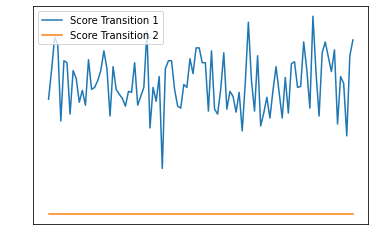

GA1の結果
最適重量：37.0
最適スコア：200.0
最適世代：86

GA2の結果
最適重量：37.0
最適スコア：200.0
最適世代：0


In [ ]:
ga1 = GeneticAlgorithm(population_num = 10,
                       generation_num = 100,
                       mutation_rate_zero_to_one = ZERO_TO_ONE,
                       elite_num = 2,
                       w_func = w_func,
                       v_func = v_func,
                       s_func = s_func)
ga1.run_genetic_algorithm()

# こちらのGAのハイパーパラメータを色々変えてみる
ga2 = GeneticAlgorithm(population_num = 10,
                       generation_num = 100,
                       mutation_rate_zero_to_one = 0.5,
                       elite_num = 2,
                       w_func = w_func,
                       v_func = v_func,
                       s_func = s_func)
ga2.run_genetic_algorithm()

# 世代数と誤差の推移を図示
plt.plot(np.arange(0,ga1.generation_num,1), ga1.score_transition, label = "Score Transition 1")
plt.plot(np.arange(0,ga2.generation_num,1), ga2.score_transition, label = "Score Transition 2")

# plt.ylim(ymin=0)
plt.tick_params(colors='white')
plt.legend()
plt.show()

print("GA1の結果")
print(f"最適重量：{ga1.w_func(ga1.best_gene)}")
print(f"最適スコア：{ga1.v_func(ga1.best_gene)}")
print(f"最適世代：{ga1.best_generation}")
# print(f"np.log(3): {np.log(2.9)}")
# print(f"最適解：{ga1.best_gene}")
# print(f"10進数に復元：{GeneticAlgorithm.decode(ga1.best_gene)/10}")
print()
print("GA2の結果")
print(f"最適重量：{ga1.w_func(ga1.best_gene)}")
print(f"最適スコア：{ga1.v_func(ga1.best_gene)}")
print(f"最適世代：{ga2.best_generation}")
# print(f"最適遺伝子：{ga2.best_gene}")

In [ ]:
# 世代数と多様性の推移を図示
plt.plot(np.arange(0,ga1.generation_num,1), ga1.diversity_transition, label ="Diversity Transition 1")
plt.plot(np.arange(0,ga2.generation_num,1), ga2.diversity_transition, label ="Diversity Transition 2")

plt.tick_params(colors='white')
plt.legend()
plt.show()

print("平均値")
print(f"GA1：{np.mean(ga1.diversity_transition)}")
print(f"GA2：{np.mean(ga2.diversity_transition)}")

# 発展課題(+30分)
「ナップザック問題なんか解けてもしょうがないんだけど」という人のために，遺伝的アルゴリズムを用いて非線形計画法を解く方法を紹介します。

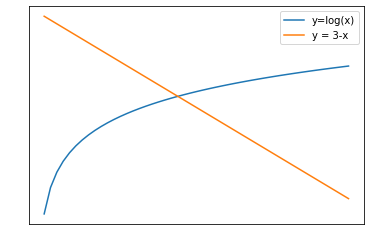

In [ ]:
# グローバル変数（遺伝子長・評価関数・制約条件）を定義
GENE_LENGTH = len(GeneticAlgorithm.encode(50, temp=[]))

w_func = lambda g: 3-GeneticAlgorithm.decode(g)/10
v_func = lambda g: np.log(GeneticAlgorithm.decode(g)/10 + 10e-7)
s_func = lambda w,v: v * (w > 0)
# s_func = lambda w,v: v * (w > v)  # 交点を求める場合

x = np.arange(1, 50, 1)
weight = 3-x/10
value = np.log(x/10)

plt.plot(x/10, value, label ="y=log(x)")
plt.plot(x/10, weight, label ="y = 3-x")
plt.tick_params(colors='white')
plt.legend()
plt.show()